In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#  Goal Of The move projcet
    1. Cleaning the dataset.
    2. Figure out hat movie features has high correlations?
    3. Answer relative questions.
    
    My assumption is budget, gross, director
    
    After analyzing the dataset, gross and budget, votes and gross, and votes and budget are 3 pairs with high correlation(>0.5)
    
    Budget and votes, votes and score, score and votes, and runtime and score are 4 pairs with midium correlation (0.4-0.5).
    
    Therefore, my original assumption for director is wrong.

#### Q1 What are top 10 profitable movies with minimum  of avg votes? 
       'Avatar', 'Avengers: Endgame', 'Titanic',
       'Star Wars: Episode VII - The Force Awakens', 'Avengers: Infinity War',
       'Jurassic World', 'The Lion King', 'Furious 7', 'Frozen II',
       'The Avengers'
       
#### Q2 What are the top 3 movie genres of the last decade, and what is their average budget in the recent 3 years?

        'Action', 'Drama', and 'Comedy' movies are the top 3 popular genre types in the past decade. 
        The average budgets for 'Action', 'Drama', and 'Comedy' movies are $88,308,045, $24,410,416, and
          $20,173,550, respectively.
       

In [2]:
# New functions or methods or discoeries that I learn 
# 1. np.mean()                      --to calculate percent
# 2. df.loc[:, df.isna().any()]     --return rows and columns which has null value
# 3. df.str.extract(patten)         --extract through regular Expression
# 4. plt.scatter or sns.scatterplot --investaget the correlation between 2 variables.
#                                   --spot the outlier. log method to lessen the outlier.
# 5. df.corr()                      --show correlaton on numeric columns or fields.   
# 6. sns.scatter

In [3]:
df = pd.read_csv('movies.csv', sep = ',')

# Step 1: Data Understanding
#### Dataframe shape
#### head and tail
#### dtypes
#### describe

In [4]:
df.shape

(7668, 15)

In [5]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
# Take a look of the data types of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [7]:
# As you can see, there are some null values in certain columns, especially in the budget column.
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',None)


In [8]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [9]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


# Step 2: Data Preperation
#### Dropping irrelevant columns and rows
#### Identifying duplicated columns
#### Null values handling
#### Data Creation / formating

In [10]:
# Creating a copy of the DataFrame instead of working on a reference
# Focusing on the columns that I need to analyze further


df = df[['name', 'rating', 
    'genre', 'year', 'released', 'score', 'votes','director', 
    'writer', 
    #'star', 
    'country', 'budget', 'gross', 'company','runtime']].copy()

In [11]:
# Summary of missing data

for col in df.columns:
    pct_null = round(np.mean(df[col].isna())*100)
    print('{} - {}%'.format(col, pct_null))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [12]:
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [13]:
# checking duplicated values
df.loc[df.duplicated()]

,name,rating,genre,year,released,score,votes,director,writer,country,budget,gross,company,runtime


In [14]:
# Data consistency handling
# Correcting country and year columns and creating the Date column with datetime format

# Use regular Expression to separate the the values in 'released'.
df_released = df.released.str.extract(r"(?P<Date>.+)?,?(?P<Year>\d{4})\s\((?P<Country>.+)\)")

df['year'] = df_released['Year']
df['Released_Date'] = pd.to_datetime(df_released.Date+df_released.Year)
df['country'] = df_released['Country']

# Dropping the 'released' column after successfully transforming the data.
df.drop(['released'], axis=1, inplace = True)
    
df.head()

,name,rating,genre,year,score,votes,director,writer,country,budget,gross,company,runtime,Released_Date
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,United States,19000000.0,46998772.0,Warner Bros.,146.0,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980-07-02
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980-06-20
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980-07-02
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980-07-25


In [15]:
# Null values handling
df.isna().sum()

name                0
rating             77
genre               0
year                2
score               3
votes               3
director            0
writer              3
country             2
budget           2171
gross             189
company            17
runtime             4
Released_Date      12
dtype: int64

In [16]:

# Dropping some rows that will not affect the whole dataset. 
df.dropna(subset=['year','score', 'votes','country','runtime','Released_Date'], inplace=True)

In [42]:
# Fill null rating values with UNKNOWN

df[df.rating.isna()]

,name,rating,genre,year,score,votes,director,writer,country,budget,gross,company,runtime,Released_Date
78,Babylon,NaN,Drama,1980,7.4,1300,Franco Rosso,Franco Rosso,United Kingdom,NaN,109749.0,Diversity Music,95.0,1980-11-01
91,Mantis Fist Fighter,NaN,Action,1982,6.7,230,Wing-Cho Yip,Hsin-Yi Chang,United States,NaN,NaN,East Asia Film Company,89.0,1982-07-09
102,Das Boot,NaN,Adventure,1982,8.3,237000,Wolfgang Petersen,Wolfgang Petersen,United States,NaN,11487676.0,Bavaria Film,149.0,1982-02-10
298,The State of Things,NaN,Drama,1983,7.0,3000,Wim Wenders,Robert Kramer,United States,NaN,3700.0,Gray City,121.0,1983-02-18
464,White Star,NaN,Drama,1985,6.0,235,Roland Klick,Karen Jaehne-Lathan,West Germany,100000.0,NaN,NaN,92.0,1985-03-08
474,The Business of Show Business,NaN,History,1983,8.3,79,Tom Logan,Tom Logan,Canada,323562.0,NaN,CTV,55.0,1983-02-15
505,Nausicaä of the Valley of the Wind,NaN,Animation,1987,8.1,157000,Hayao Miyazaki,Hayao Miyazaki,United States,1000000.0,8736506.0,Nibariki,117.0,1987-11-25
638,Winter Flight,NaN,Drama,1986,7.3,67,Roy Battersby,Alan Janes,United States,NaN,2729.0,Enigma Productions,89.0,1986-02-14
839,Tea in the Harem,NaN,Drama,1986,6.9,397,Mehdi Charef,Mehdi Charef,United States,NaN,NaN,Centre national du cinéma et de l'image animée...,110.0,1986-06-06
842,Sincerely Charlotte,NaN,Drama,1986,5.6,139,Caroline Huppert,Caroline Huppert,United States,NaN,NaN,Les Films de la Tour,88.0,1986-07-18


In [18]:
# Data Formating

df['year'] = df['year'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [19]:
# The number of ull values of budget column is large. Dropping it will affect the calculation result.
# Therefore, I make a copy of df without null values for calculation just in case.

df_cleaned = df.dropna().copy()

In [20]:
# Converting the colums (budget, gross, runtime) to int format

df_cleaned['budget'] = df_cleaned['budget'].astype('int64')
df_cleaned['gross'] = df_cleaned['gross'].astype('int64')
df_cleaned['runtime'] = df_cleaned['runtime'].astype('int64')

df_cleaned.dtypes

name                     object
rating                   object
genre                    object
year                      int64
score                   float64
votes                     int64
director                 object
writer                   object
country                  object
budget                    int64
gross                     int64
company                  object
runtime                   int64
Released_Date    datetime64[ns]
dtype: object

# Step 3: Feature Understanding
#### (Univariate analysis)
#### Plotting Feature Distributions
Histogram
   /    KDE
   /    Boxplot

Text(0, 0.5, 'Avg Budget')

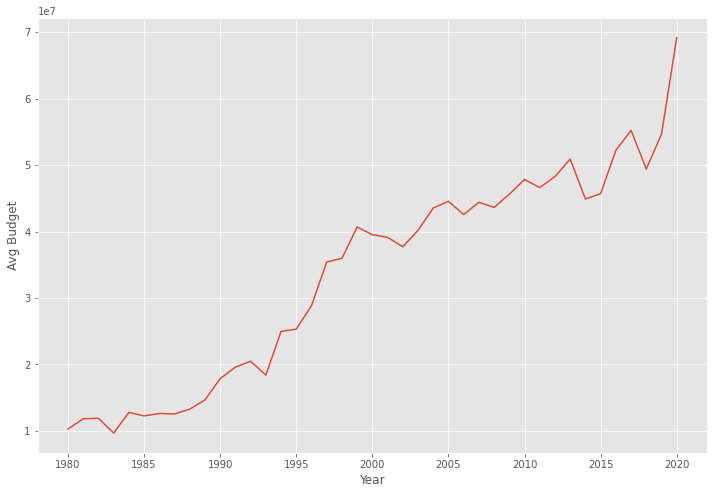

In [21]:
ax = df.groupby('year').budget.mean().astype(int) \
    .plot(kind='line')

ax.set_xlabel('Year')
ax.set_ylabel('Avg Budget')

Text(0, 0.5, 'Frequency')

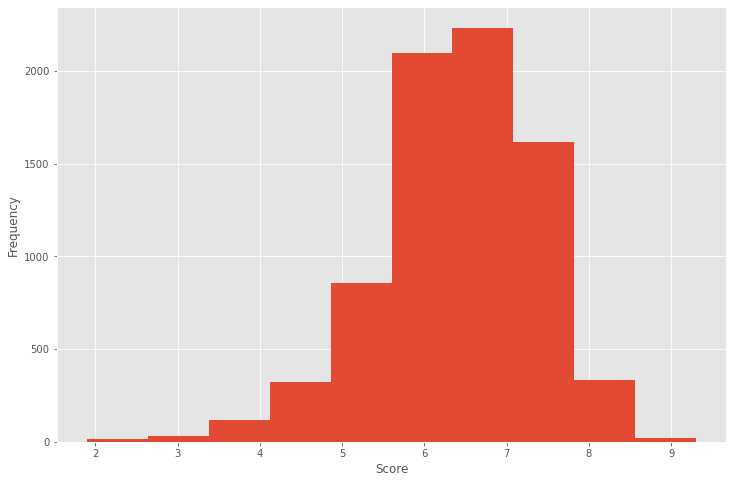

In [22]:
ax = df.score.plot(kind='hist')
ax.set_xlabel('Score')
ax.set_ylabel('Frequency')

<AxesSubplot:ylabel='Density'>

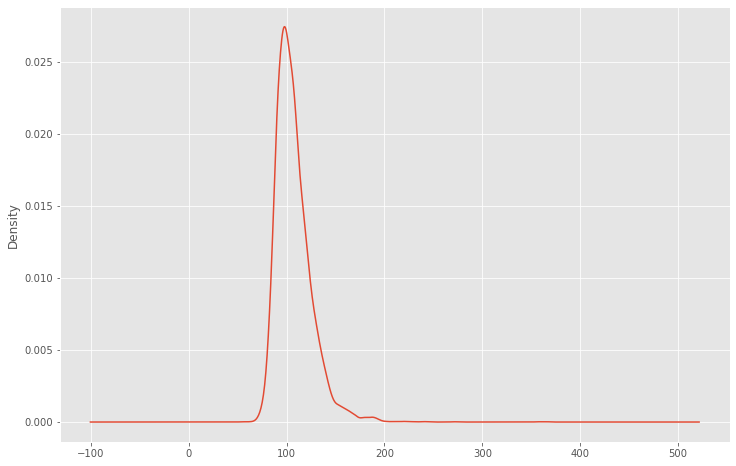

In [23]:
df.runtime.plot(kind='kde')

# Step 4: Feature Relationships
#### Scatterplot
##### Correlation
##### Heatmap

In [24]:
# My assumption
# Budget high correlation
# Director high correlation
# Votes high correlation

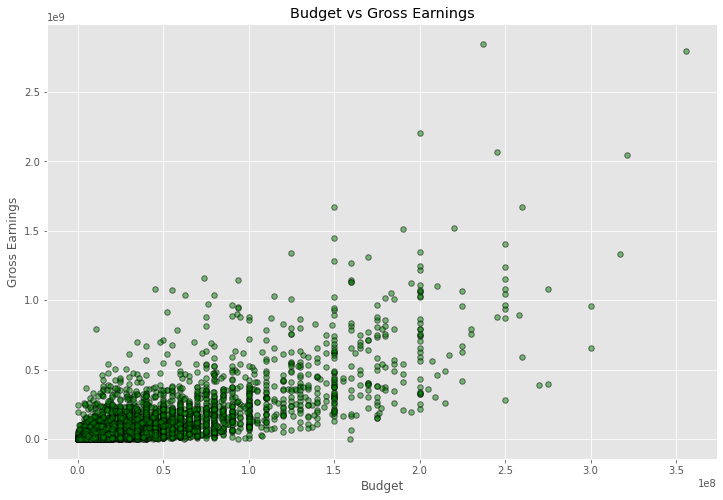

In [25]:
# Let's investigate the budget vs gross

plt.scatter(x='budget', 
            y='gross', 
            data=df,
            s=30,
            c='green',
            edgecolor = 'black',
            linewidth = 1,
            alpha=0.5
           )

# plt.xscale('log')
# plt.yscale('log')   

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

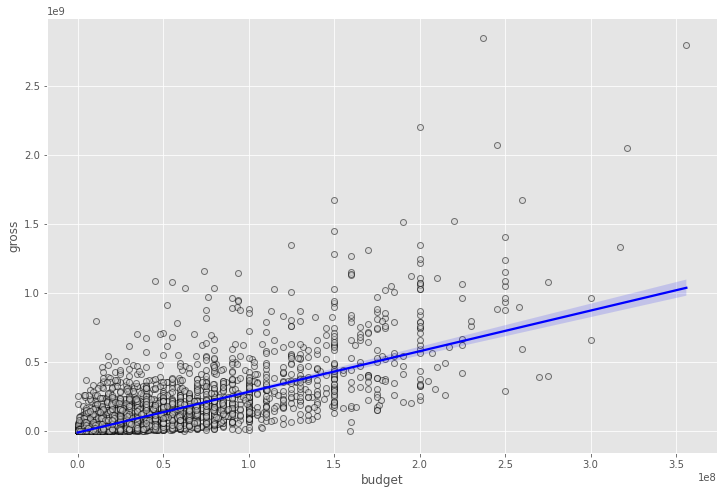

In [26]:
# Regression plot to keep investigating using seaborn (budget vs gross earnings)


sns.regplot(x=df['budget'], 
            y=df['gross'],
            robust=True,
            scatter_kws = {'edgecolor' :'black', 'linewidth' : 1 , 'alpha' : 0.5, 'color' : 'lightgrey' },
            line_kws = {'color':'blue'}
           )


In [27]:
# You can tell that budget do have #positive correlation with gross earnings.

In [28]:
# Correlation investigation

df.corr(method = 'pearson') # pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.106696,0.218427,0.323480,0.250531,0.120536
score,0.106696,1.000000,0.409492,0.076127,0.186309,0.399890
votes,0.218427,0.409492,1.000000,0.442194,0.630657,0.309191
budget,0.323480,0.076127,0.442194,1.000000,0.740334,0.320461
gross,0.250531,0.186309,0.630657,0.740334,1.000000,0.245205
runtime,0.120536,0.399890,0.309191,0.320461,0.245205,1.000000


In [29]:
# Budget has high correlation with gross.

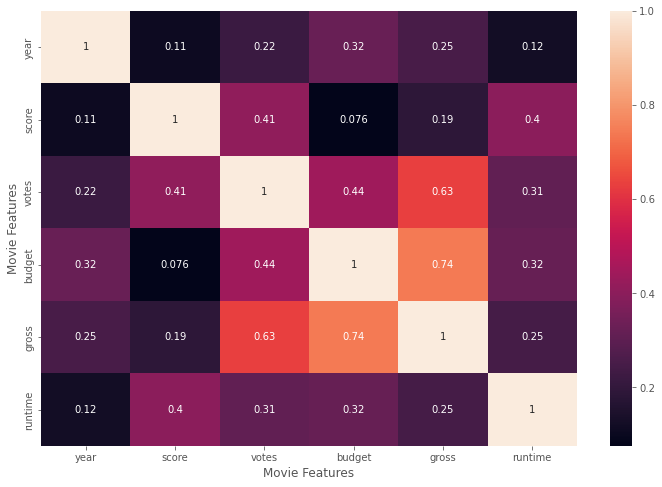

In [30]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot =True)

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [31]:
# Votes has high correlation with gross earnings.
# votes has some correlations with budget and scores.

In [32]:
# Investigating correlation for non-numeric columns of movie features
# Like verity my assumsion that director with high correlations.

In [33]:
df.head()

,name,rating,genre,year,score,votes,director,writer,country,budget,gross,company,runtime,Released_Date
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,United States,19000000.0,46998772.0,Warner Bros.,146.0,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980-07-02
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980-06-20
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980-07-02
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980-07-25


In [34]:
df_numerized = df.copy()

for col in df_numerized.columns:
    if (df_numerized[col]).dtype == 'object':
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
        
df_numerized

,name,rating,genre,year,score,votes,director,writer,country,budget,gross,company,runtime,Released_Date
0,6572,6,6,1980,8.4,927000,2581,4006,55,19000000.0,46998772.0,2309,146.0,1980-06-13
1,5561,6,1,1980,5.8,65000,2261,1627,55,4500000.0,58853106.0,727,104.0,1980-07-02
2,5132,4,0,1980,8.7,1200000,1107,2561,55,18000000.0,538375067.0,1531,124.0,1980-06-20
3,286,4,4,1980,7.7,221000,1295,1994,55,3500000.0,83453539.0,1802,88.0,1980-07-02
4,1027,6,4,1980,7.3,108000,1050,518,55,6000000.0,39846344.0,1767,98.0,1980-07-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7659,2650,3,10,2020,3.4,447,1604,2460,55,NaN,13266.0,1982,87.0,2020-03-03
7660,338,-1,4,2020,7.1,14,2583,3983,55,NaN,NaN,83,90.0,2020-11-05
7663,3700,-1,6,2020,3.1,18,1494,2283,55,7000.0,NaN,-1,90.0,2020-10-23
7664,1677,-1,4,2020,4.7,36,772,2608,55,NaN,NaN,535,90.0,2020-02-07


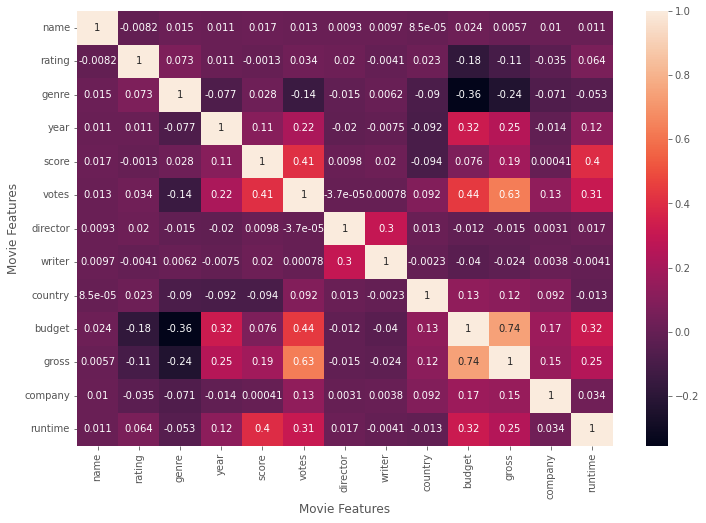

In [35]:
df_numerized.corr()

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot =True)

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [36]:
# Director seems has no correlation. My assumption is worng.

In [37]:
pd.set_option('display.max_rows', None)

corr_pairs = df_numerized.corr().unstack().sort_values(ascending=False)

corr_pairs

name      name        1.000000
rating    rating      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
year      year        1.000000
genre     genre       1.000000
director  director    1.000000
runtime   runtime     1.000000
gross     budget      0.740334
budget    gross       0.740334
votes     gross       0.630657
gross     votes       0.630657
votes     budget      0.442194
budget    votes       0.442194
votes     score       0.409492
score     votes       0.409492
          runtime     0.399890
runtime   score       0.399890
budget    year        0.323480
year      budget      0.323480
runtime   budget      0.320461
budget    runtime     0.320461
votes     runtime     0.309191
runtime   votes       0.309191
director  writer      0.298398
writer    director    0.298398
year      gross       0.250531
gross   

In [38]:
corr_pairs[corr_pairs > 0.5]

name      name        1.000000
rating    rating      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
year      year        1.000000
genre     genre       1.000000
director  director    1.000000
runtime   runtime     1.000000
gross     budget      0.740334
budget    gross       0.740334
votes     gross       0.630657
gross     votes       0.630657
dtype: float64

In [39]:
# As you can see, votes has high correlations.

# Step 5: Ask a Question about the data.

1.  What are top 10 profitable movies with minimum  of avg votes? 
2.  

,profit_estimated
name,
Avatar,2610246203
Avengers: Endgame,2441501328
Titanic,2001647264
Star Wars: Episode VII - The Force Awakens,1824521700
Avengers: Infinity War,1727359754
Jurassic World,1520516444
The Lion King,1410727580
Furious 7,1325341399
Frozen II,1300026933


<AxesSubplot:ylabel='name'>

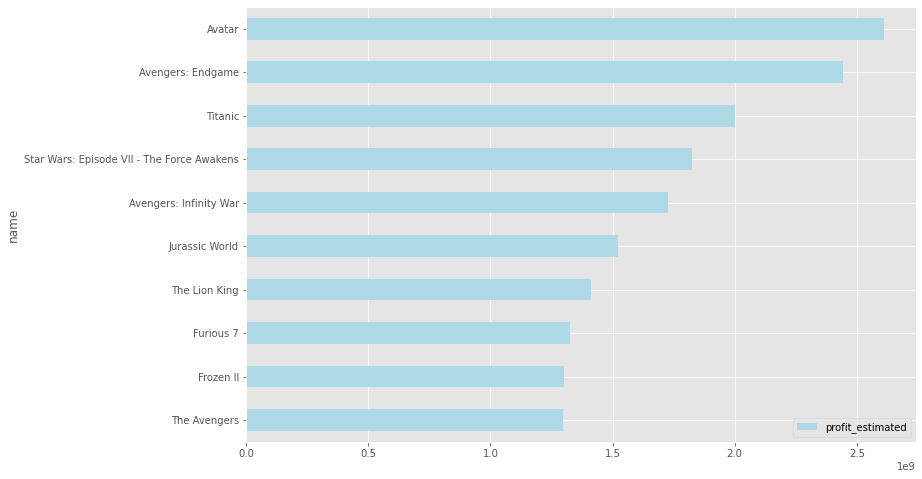

In [40]:
# 1. What are top 10 profitable movies with minimum  of avg votes? 
votes_mean = df.votes.mean()

df_cleaned['profit_estimated'] = df_cleaned['gross'] - df_cleaned['budget'] 

ax = df_cleaned.query(f'votes > {votes_mean}')[['name', 'profit_estimated']]    \
    .dropna()  \
    .sort_values('profit_estimated', ascending = False)  \
    .head(10).set_index('name')

display(ax)

ax.sort_values('profit_estimated').plot(kind = 'barh', color = 'lightblue')


genre,Action,Adventure,Animation,Biography,Comedy,Crime,Drama
year,,,,,,,
2011,49.0,10.0,15.0,13.0,47.0,9.0,55.0
2012,47.0,11.0,12.0,10.0,53.0,11.0,36.0
2013,56.0,10.0,11.0,16.0,42.0,12.0,39.0
2014,55.0,11.0,10.0,11.0,50.0,12.0,41.0
2015,63.0,10.0,12.0,21.0,43.0,8.0,44.0
2016,61.0,7.0,19.0,22.0,35.0,8.0,35.0
2017,53.0,6.0,17.0,24.0,33.0,12.0,45.0
2018,52.0,12.0,13.0,30.0,34.0,17.0,37.0
2019,60.0,15.0,17.0,19.0,43.0,9.0,49.0


<AxesSubplot:xlabel='year', ylabel='Movie count'>

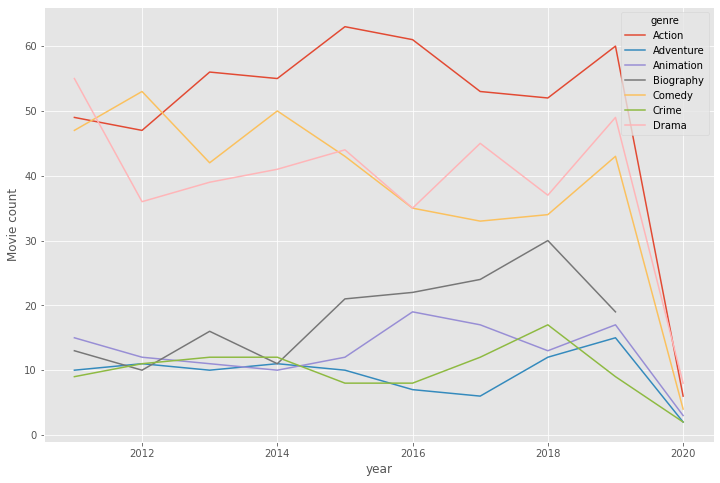

In [47]:
# 2. What are the top 3 movie genres of the last decade, and what is their average budget in the recent 3 years?

ax = df.groupby('year').genre.value_counts().unstack().iloc[-10:,0:7]

display(ax)

data = ax.unstack().reset_index().rename(columns= {0:'Movie count'})

sns.lineplot(x='year', y='Movie count', data = data, hue='genre')

,mean,median
genre,,
Action,88308045,62000000
Comedy,24410416,19000000
Drama,20173550,10000000


<AxesSubplot:xlabel='genre', ylabel='budget'>

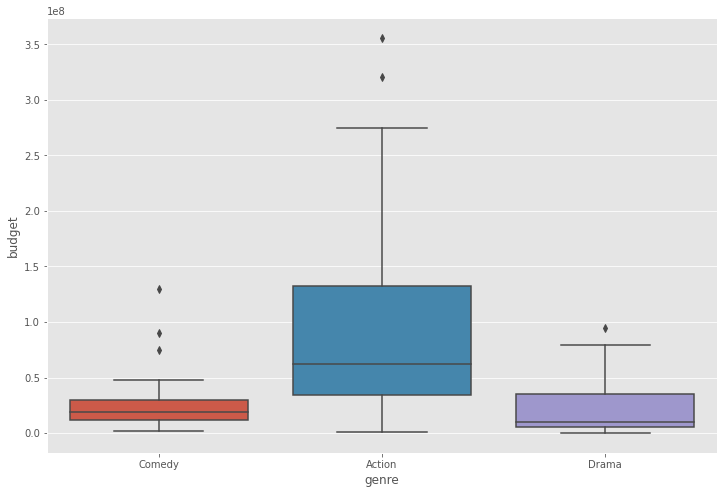

In [51]:
top3_genre_list = ['Action', 'Drama', 'Comedy']
years = ['2018','2019','2020']

ax = df.astype({'year':'str'}).query('year in @years and genre in @top3_genre_list')

display(ax.groupby('genre').budget.agg(['mean', 'median']).astype(int))


sns.boxplot(x='genre', y='budget', data=ax)

In [ ]:
# 'Action', 'Drama', and 'Comedy' movies are the top 3 popular genre types in the past decade. 
# The average budgets for 'Action', 'Drama', and 'Comedy' movies are $88,308,045, $24,410,416, and $20,173,550, respectively.